<a href="https://colab.research.google.com/github/luadeprataart/Reconhecimento-de-Padroes/blob/main/10_Redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aula 08 - Redes neurais

In [1]:
import pandas as pd

cardio = pd.read_csv('heart.csv')
# referencia: https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
cardio.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('target')

X = cardio[features]

y = cardio.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 13)
(212,)
(91, 13)
(91,)


### Regressão Logística no Scikit-Learn

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_pred = model.predict(X_test)

from sklearn.metrics import f1_score

f1_score(y_pred, y_test)

0.826923076923077

In [6]:
for C in [-2,-1,0,1,2]:

  C = 10 ** C

  model = LogisticRegression(C=C, max_iter=500, random_state=2021)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(C, '->', f1_score(y_pred, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.01 -> 0.7272727272727272
0.1 -> 0.8076923076923077
1 -> 0.796116504854369


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 -> 0.8155339805825242
100 -> 0.803921568627451


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regressão logísticas com Keras

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import numpy as np
np.random.seed(1)

import tensorflow as tf
tf.random.set_seed(1)

In [8]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

In [9]:
model = keras.Sequential([
    normalizer,
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 13)                27        
 on)                                                             
                                                                 
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 41 (168.00 Byte)
Trainable params: 14 (56.00 Byte)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

# verbose=0 não gera saida

In [12]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)


def plot_acc(history):
    plt.plot(history.history['accuracy'], label='acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)

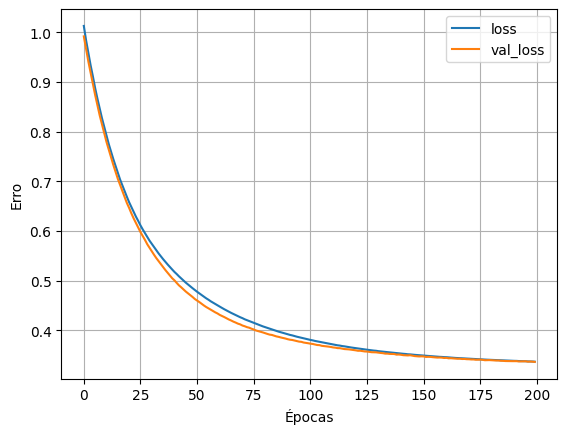

In [13]:
plot_loss(history)

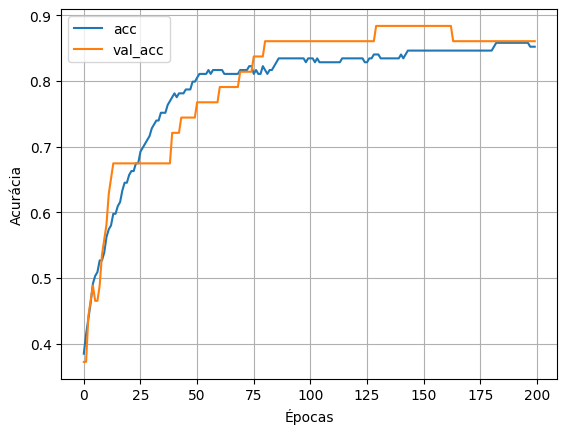

In [14]:
plot_acc(history)

In [15]:
y_pred = model.predict(X_test)

y_pred

3/3 [==============================] - 0s 3ms/step


array([[0.00691466],
       [0.6685163 ],
       [0.11605815],
       [0.01019356],
       [0.05264212],
       [0.00412752],
       [0.02318637],
       [0.7581943 ],
       [0.00557938],
       [0.99037   ],
       [0.30051035],
       [0.07687391],
       [0.7948799 ],
       [0.15168072],
       [0.2604839 ],
       [0.931213  ],
       [0.98360735],
       [0.00885303],
       [0.58828926],
       [0.82105225],
       [0.97345114],
       [0.03018556],
       [0.65444267],
       [0.97230035],
       [0.96034086],
       [0.8613579 ],
       [0.00702797],
       [0.96607035],
       [0.8704689 ],
       [0.9747263 ],
       [0.95183474],
       [0.8284185 ],
       [0.8189102 ],
       [0.73824245],
       [0.09575075],
       [0.5022284 ],
       [0.19690032],
       [0.28914583],
       [0.627312  ],
       [0.10806735],
       [0.9507362 ],
       [0.08886738],
       [0.27844888],
       [0.01289236],
       [0.77779025],
       [0.8111985 ],
       [0.3045583 ],
       [0.621

In [16]:
import numpy as np

f1_score(np.round(y_pred.reshape(-1)), y_test)

0.826923076923077

In [17]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4326 - accuracy: 0.8022


[0.43263471126556396, 0.8021978139877319]

### Rede neural classificadora

In [18]:
# opcoes: adicionar camadas,
#         mudar o tamanho das camadas,
#         mudar a ativação das camadas,
#         inibir alguns neurônios (dropout)


model = keras.Sequential([
    normalizer,
    layers.Dense(10, activation='tanh'),

    layers.Dense(5, activation='tanh'),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_split = 0.2,
    batch_size=10,
    verbose=0
    )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 13)                27        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                140       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 228 (916.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 27 (112.00 Byte)
_________________________________________________________________


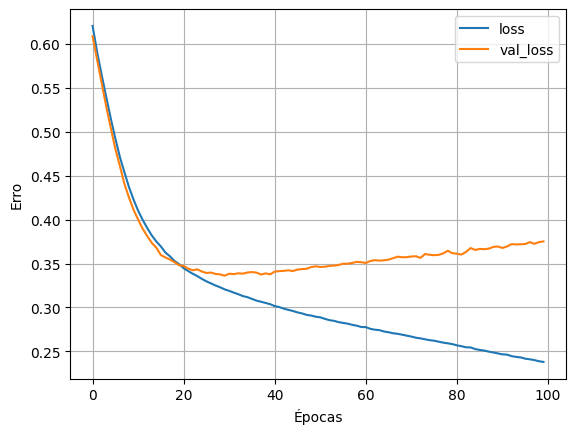

In [19]:
plot_loss(history)

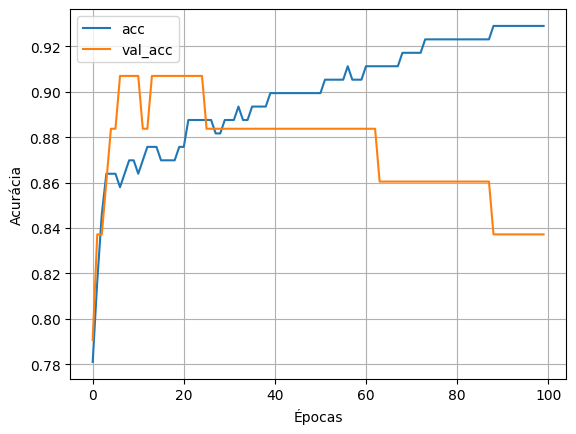

In [20]:
plot_acc(history)

In [21]:
y_pred = model.predict(X_test).reshape(-1)

from sklearn.metrics import accuracy_score

accuracy_score(np.round(y_pred), y_test)

3/3 [==============================] - 0s 3ms/step


0.8241758241758241

### Redes neurais regressoras

In [22]:
from sklearn.model_selection import train_test_split

features = cardio.columns.tolist()
features.remove('age')
features.remove('target')

X = cardio[features]

y = cardio.age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(212, 12)
(212,)
(91, 12)
(91,)


In [23]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train.values)

In [24]:
model = keras.Sequential([
    normalizer,
    layers.Dense(10),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
])

model.summary()

model.compile(optimizer='adam',
              loss='mean_absolute_error')

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split = 0.2,
    batch_size=8,
    verbose=0
    )

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 12)                25        
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 10)                130       
                                                                 
 dense_5 (Dense)             (None, 7)                 77        
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 278 (1.09 KB)
Trainable params: 253 (1012.00 Byte)
Non-trainable params: 25 (104.00 Byte)
________________

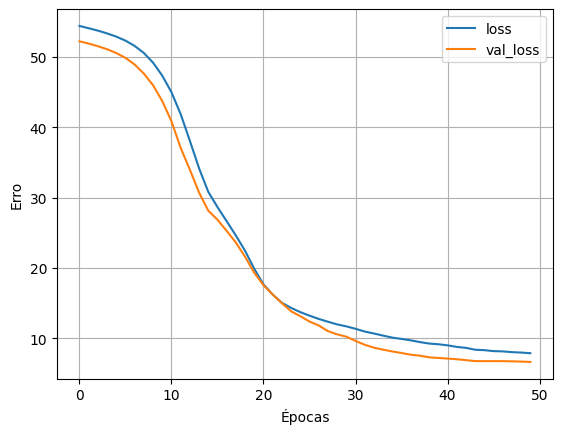

In [25]:
plot_loss(history)

In [26]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred)

3/3 [==============================] - 0s 4ms/step
[78.552124 47.874043 49.648678 53.12121  55.847816 51.512646 55.92945
 52.528904 58.857574 53.63982  45.305847 63.269566 56.080936 51.080406
 51.938778 45.64542  50.49552  75.13431  40.32327  62.760555 52.991543
 61.931664 45.384987 49.782536 47.116592 50.065487 55.834858 47.683994
 50.37982  52.435444 43.306664 42.875412 60.624435 59.613316 51.162647
 40.73114  48.874645 44.47516  50.434494 56.81782  49.112793 46.794098
 52.04936  92.31352  52.321    56.029194 54.835846 57.750557 45.069817
 60.31245  37.407513 41.260174 50.810917 54.17753  52.36971  49.621616
 74.8932   59.804493 41.968594 60.537403 58.790073 52.334236 49.52693
 58.816494 43.388935 48.44115  67.79595  59.51802  64.00053  62.585598
 60.394318 47.308964 65.21138  52.62054  62.11582  70.735344 45.722595
 51.498634 48.952656 45.56751  44.511326 48.34094  66.87522  42.33104
 42.137516 54.70853  75.154686 57.864277 45.282486 55.031578 53.162056]


In [27]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 7.3605


7.360496520996094

In [28]:
y_test.mean()

55.043956043956044

In [29]:
y_pred.mean()

53.87072